In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
data = pd.read_csv('./spam_or_not_spam.csv')

In [11]:
data.shape

(3000, 2)

In [12]:
data.isnull().sum()

email    1
label    0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

email    0
label    0
dtype: int64

In [15]:
# X = data["email"]
# y = data["label"]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data["email"])
y = data["label"]

In [17]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 243717 stored elements and shape (2999, 33812)>
  Coords	Values
  (0, 6787)	0.019127342888877488
  (0, 31946)	0.03434469878022929
  (0, 19273)	0.41351776159433057
  (0, 2191)	0.03325097519137673
  (0, 4848)	0.037561505506329744
  (0, 11287)	0.04254712701072452
  (0, 6612)	0.04919483335405254
  (0, 6790)	0.04653143252805726
  (0, 19509)	0.06525172906645603
  (0, 7001)	0.10004136646142237
  (0, 5365)	0.05461369203557425
  (0, 17553)	0.02165678130336906
  (0, 13380)	0.03914307070000006
  (0, 29465)	0.04919483335405254
  (0, 31399)	0.043674095346604616
  (0, 24711)	0.053152084381279864
  (0, 9368)	0.062041288477257074
  (0, 24645)	0.06859746985467889
  (0, 16263)	0.019657834790040254
  (0, 29377)	0.019646883743854
  (0, 9971)	0.045719143233070456
  (0, 6906)	0.050938474026127785
  (0, 16529)	0.033779729059921444
  (0, 22035)	0.36478897577074154
  (0, 12355)	0.051438724888472565
  :	:
  (2998, 15713)	0.046475265236599735
  (2998,

In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 2999, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [21]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty': ['l1','l2','elasticnet'], 'C':[1,2,4,3,54,5,6,8,10,23,12,43,56,67,69], 'max_iter':[100,200,300]}

In [22]:
classifier_regressor=GridSearchCV(reg, param_grid=parameter, scoring='accuracy', cv=5)

In [23]:
classifier_regressor.fit(X_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 3, 54, 5, 6, 8, 10, 23, 12, 43, 56, 67,
                               69],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [24]:
print(classifier_regressor.best_params_)

{'C': 69, 'max_iter': 100, 'penalty': 'l2'}


In [25]:
predicted = classifier_regressor.predict(X_test)
# predicted

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(predicted, y_test)

In [27]:
accuracy

0.9777777777777777

In [28]:
confusion = confusion_matrix(predicted, y_test)

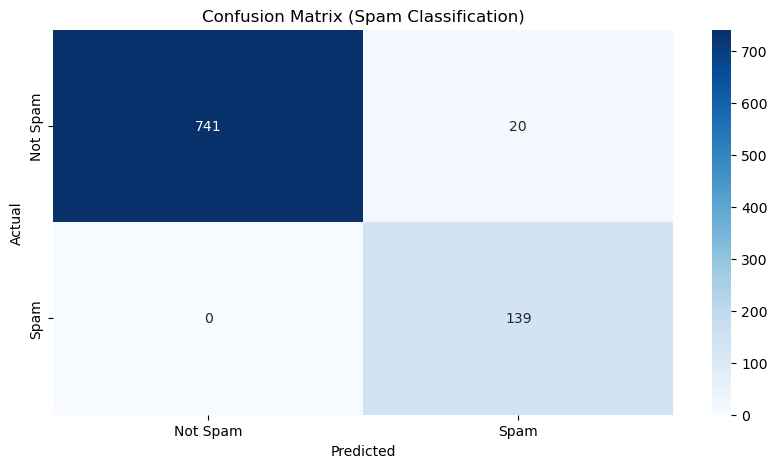

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Spam Classification)')
plt.show()

In [30]:
import pickle

In [31]:
pickle.dump(classifier_regressor, open('spam_classifier.pkl', 'wb'))

In [32]:
pickled_model = pickle.load(open('spam_classifier.pkl', 'rb'))

In [33]:
pickled_model.predict(X_test[8])

array([1])

In [34]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))